In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [2]:
dataset = pd.read_csv('dataset.csv')
X = pd.DataFrame(dataset.iloc[:, [5,9]].values)

In [3]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean',verbose=0)
X.values[:, 0:1] = imputer.fit_transform(X.values[:, 0:1])

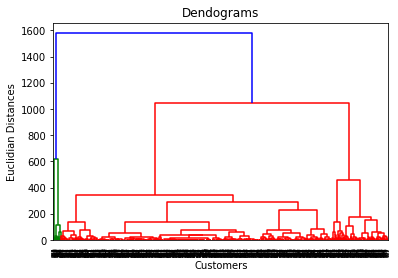

In [4]:
#using the dendogram to find optimal number of clusters
import scipy.cluster.hierarchy as sch
dendograms = sch.dendrogram(sch.linkage(X, method='ward'))#sch.linkage is algorithm of hierarchical clustering
plt.title('Dendograms')
plt.xlabel('Customers')
plt.ylabel('Euclidian Distances')
plt.show()

In [5]:
# fitting the hierarchical clustering
from sklearn.cluster import AgglomerativeClustering # bottom to up clustering
hc = AgglomerativeClustering(n_clusters=2, affinity='euclidean' , linkage='ward')
y_hc = hc.fit_predict(X)

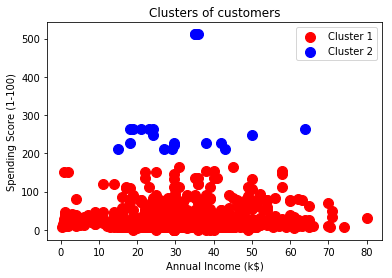

In [6]:
# Visualising the clusters
plt.scatter(X.values[y_hc == 0, 0], X.values[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X.values[y_hc == 1, 0], X.values[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()